In [44]:
import pandas as pd 

In [45]:
df = pd.read_csv("Data_preprocessing.csv")

In [46]:
df

,Model,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Region_Africa,Region_Asia,Region_Europe,...,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,-1.258064,-0.234876,0.250548,0.887814,0.911817,1.131530,1,-0.444624,2.216836,-0.447235,...,-0.447686,2.215417,-0.447750,-0.446269,-0.570052,-0.576457,-0.584002,1.727444,-0.993859,0.993859
1,1.575953,-0.928611,-1.632377,0.368717,0.160951,-0.573911,0,-0.444624,-0.451093,-0.447235,...,-0.447686,2.215417,-0.447750,-0.446269,-0.570052,-0.576457,1.712324,-0.578890,1.006179,-1.006179
2,-1.258064,1.152595,1.241561,-1.541504,1.470514,0.674365,0,-0.444624,-0.451093,-0.447235,...,-0.447686,-0.451382,-0.447750,-0.446269,-0.570052,-0.576457,-0.584002,1.727444,1.006179,-1.006179
3,0.316390,1.615085,-1.533276,-1.260805,-0.540950,-0.357231,0,-0.444624,-0.451093,-0.447235,...,-0.447686,-0.451382,-0.447750,-0.446269,-0.570052,-0.576457,-0.584002,1.727444,1.006179,-1.006179
4,-0.943173,0.690105,-1.136871,0.376656,-0.966867,-0.695729,0,-0.444624,-0.451093,-0.447235,...,-0.447686,-0.451382,-0.447750,-0.446269,1.754225,-0.576457,-0.584002,-0.578890,-0.993859,0.993859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.261062,-0.697366,1.340662,0.875423,-1.234811,1.090224,1,-0.444624,2.216836,-0.447235,...,-0.447686,2.215417,-0.447750,-0.446269,-0.570052,-0.576457,1.712324,-0.578890,-0.993859,0.993859
49996,1.261062,1.383840,0.944257,0.812704,-1.012409,1.662205,1,-0.444624,-0.451093,-0.447235,...,-0.447686,-0.451382,2.233388,-0.446269,-0.570052,1.734734,-0.584002,-0.578890,-0.993859,0.993859
49997,-1.258064,-1.622346,1.241561,1.288067,-1.111955,1.124529,1,-0.444624,-0.451093,-0.447235,...,-0.447686,2.215417,-0.447750,-0.446269,-0.570052,-0.576457,-0.584002,1.727444,1.006179,-1.006179
49998,1.261062,0.690105,0.547852,-1.672880,-0.633457,1.546689,1,-0.444624,2.216836,-0.447235,...,-0.447686,-0.451382,-0.447750,2.240802,-0.570052,1.734734,-0.584002,-0.578890,1.006179,-1.006179


In [47]:
x = df.drop("Sales_Classification", axis=1)
y = df["Sales_Classification"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42) 

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [51]:
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
y_pred = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [54]:
score = accuracy_score(y_test,y_pred)

In [55]:
score

1.0

# Cros validation kodi 

In [15]:
from sklearn.model_selection import cross_val_score, KFold

In [56]:
kn = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv = kn, scoring="accuracy")
print(scores)

[1. 1. 1. 1. 1.]


In [57]:
import numpy as np 
print(np.mean(scores).round(2))

1.0


In [58]:
np.std(scores)

np.float64(0.0)

In [63]:
import pandas as pd 
from scipy.stats import skew 

data1 = [10, 12, 12, 13, 12, 11, 13, 14, 12] # normal 
data2 = [1, 2, 2, 3, 3, 4, 100] # positive 
data3 = [100, 90, 80, 70, 60, 55, 50, 1] # negative

print("Normal skewnes:", skew(data1))
print("Positive skewnes:", skew(data2))
print("Negative skewnes:", skew(data3))


Normal skewnes: -0.22058433115731826
Positive skewnes: 2.0383505947893426
Negative skewnes: -0.914954846719111


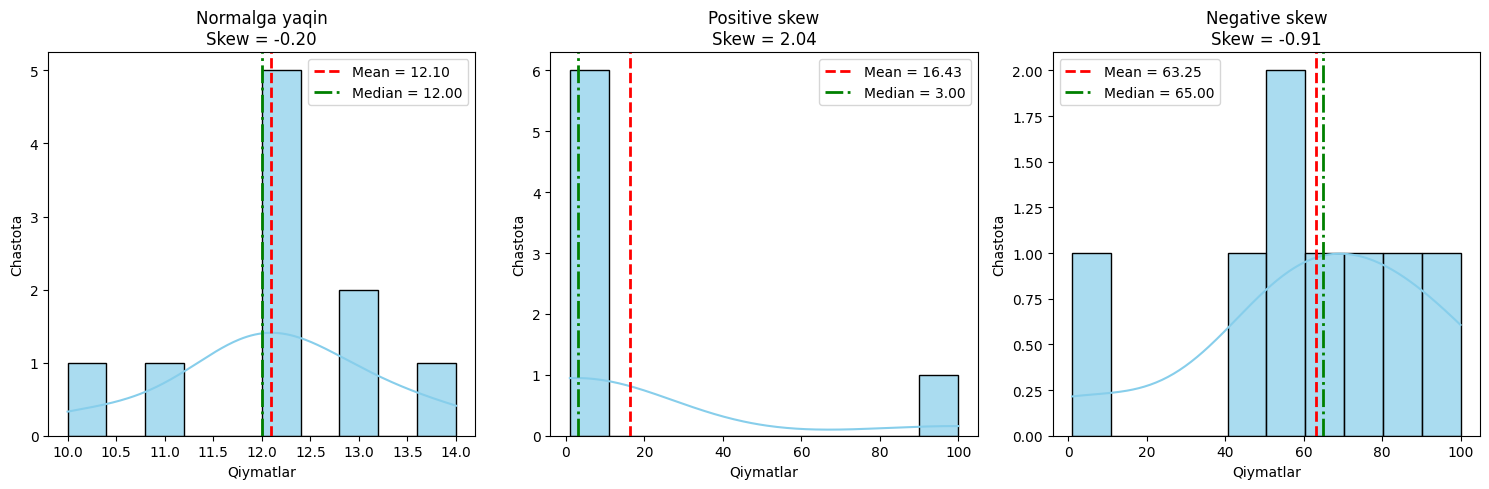

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew

# Ma'lumotlar
data1 = [10, 12, 12, 13, 12, 11, 12, 13, 14, 12]   # normalga yaqin
data2 = [1, 2, 2, 3, 3, 4, 100]                    # positive skew
data3 = [100, 90, 80, 70, 60, 55, 50, 1]           # negative skew

datasets = {
    "Normalga yaqin": data1,
    "Positive skew": data2,
    "Negative skew": data3
}

# Grafiklar
plt.figure(figsize=(15, 5))

for i, (title, data) in enumerate(datasets.items(), 1):
    plt.subplot(1, 3, i)
    
    # Histogram + KDE
    sns.histplot(data, kde=True, bins=10, color="skyblue", edgecolor="black", alpha=0.7)
    
    # O'rtacha va median
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f}")
    plt.axvline(median_val, color="green", linestyle="-.", linewidth=2, label=f"Median = {median_val:.2f}")
    
    # Sarlavha + Skewness qiymati
    plt.title(f"{title}\nSkew = {skew(data):.2f}")
    plt.xlabel("Qiymatlar")
    plt.ylabel("Chastota")
    plt.legend()

plt.tight_layout()
plt.show()


In [60]:
df.skew()

Model                     0.003606
Year                     -0.001496
Engine_Size_L            -0.001285
Mileage_KM               -0.006677
Price_USD                -0.000034
Sales_Volume             -0.012126
Sales_Classification      0.847511
Region_Africa             1.804519
Region_Asia               1.765795
Region_Europe             1.788779
Region_Middle East        1.781266
Region_North America      1.788586
Region_South America      1.804910
Color_Black               1.800616
Color_Blue                1.802761
Color_Grey                1.786077
Color_Red                 1.764087
Color_Silver              1.785692
Color_White               1.794587
Fuel_Type_Diesel          1.184208
Fuel_Type_Electric        1.158311
Fuel_Type_Hybrid          1.128356
Fuel_Type_Petrol          1.148589
Transmission_Automatic    0.012321
Transmission_Manual      -0.012321
dtype: float64

#  |skew|<0.5 deyarli normal
#  0.5≤|skew|<1 biroz skew bor 
#  |skew|>1 juda kuchli skew bor

# Model, Year, Engine_Size_L, Mileage_KM, Price_USD, Sales_Volume, Transmission → normal (skew ≈ 0)

# Sales_Classification (0.84) → biroz skew (transformatsiya yordam beradi)

# Region_xxx va Color_xxx (1.76 – 1.80 atrofida) → juda kuchli positive skew

# Fuel_Type_xxx (1.12 – 1.18 atrofida) → kuchli positive skew

# Skewness positive (o‘ngga cho‘zilgan) bo‘lgani uchun quyidagilar ishlatiladi:

# log transform (faqat > 0 bo‘lgan ustunlarda)

# Square root transform

# Box-Cox transform (scipy orqali, > 0 qiymatlar uchun)

# Yeo-Johnson transform (sklearn, musbat va manfiy qiymatlar uchun ham ishlaydi)

In [65]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Sizning skew qiymatlaringizni DataFrame shaklida
skew_values = pd.Series({
    "Model": 0.003606,
    "Year": -0.001496,
    "Engine_Size_L": -0.001285,
    "Mileage_KM": -0.006677,
    "Price_USD": -0.000034,
    "Sales_Volume": -0.012126,
    "Sales_Classification": 0.847511,
    "Region_Africa": 1.804519,
    "Region_Asia": 1.765795,
    "Region_Europe": 1.788779,
    "Region_Middle East": 1.781266,
    "Region_North America": 1.788586,
    "Region_South America": 1.804910,
    "Color_Black": 1.800616,
    "Color_Blue": 1.802761,
    "Color_Grey": 1.786077,
    "Color_Red": 1.764087,
    "Color_Silver": 1.785692,
    "Color_White": 1.794587,
    "Fuel_Type_Diesel": 1.184208,
    "Fuel_Type_Electric": 1.158311,
    "Fuel_Type_Hybrid": 1.128356,
    "Fuel_Type_Petrol": 1.148589,
    "Transmission_Automatic": 0.012321,
    "Transmission_Manual": -0.012321
})

# Skewness darajasini tasniflash
def classify_skew(val):
    if abs(val) < 0.5:
        return "✅ Normal (transform kerak emas)"
    elif abs(val) < 1:
        return "⚠️ Biroz skew (transform foydali)"
    else:
        return "❌ Kuchli skew (transform zarur)"

skew_check = skew_values.apply(classify_skew)
print(skew_check)


Model                       ✅ Normal (transform kerak emas)
Year                        ✅ Normal (transform kerak emas)
Engine_Size_L               ✅ Normal (transform kerak emas)
Mileage_KM                  ✅ Normal (transform kerak emas)
Price_USD                   ✅ Normal (transform kerak emas)
Sales_Volume                ✅ Normal (transform kerak emas)
Sales_Classification      ⚠️ Biroz skew (transform foydali)
Region_Africa               ❌ Kuchli skew (transform zarur)
Region_Asia                 ❌ Kuchli skew (transform zarur)
Region_Europe               ❌ Kuchli skew (transform zarur)
Region_Middle East          ❌ Kuchli skew (transform zarur)
Region_North America        ❌ Kuchli skew (transform zarur)
Region_South America        ❌ Kuchli skew (transform zarur)
Color_Black                 ❌ Kuchli skew (transform zarur)
Color_Blue                  ❌ Kuchli skew (transform zarur)
Color_Grey                  ❌ Kuchli skew (transform zarur)
Color_Red                   ❌ Kuchli ske

In [73]:
import numpy as np
df["log_transformed"] = np.log1p(df["Region_Africa"])

In [74]:
df["sqrt_transformed"] = np.sqrt(df["Region_Africa"])

C:\Users\IT-PARK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
pt = PowerTransformer(method='yeo-johnson')
df["yeoJohnson"] = pt.fit_transform(df[["Region_Africa"]])

In [76]:
print("Original skew:", df["Region_Africa"].skew())
print("Log skew:", df["log_transformed"].skew())
print("Sqrt skew:", df["sqrt_transformed"].skew())
print("Yeo-Johnson skew:", df["yeojohnson"].skew())

Original skew: 1.804519114073498
Log skew: 1.8045191140734995
Sqrt skew: 0.0


KeyError: 'yeojohnson'

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   50000 non-null  float64
 1   Year                    50000 non-null  float64
 2   Engine_Size_L           50000 non-null  float64
 3   Mileage_KM              50000 non-null  float64
 4   Price_USD               50000 non-null  float64
 5   Sales_Volume            50000 non-null  float64
 6   Sales_Classification    50000 non-null  int64  
 7   Region_Africa           50000 non-null  float64
 8   Region_Asia             50000 non-null  float64
 9   Region_Europe           50000 non-null  float64
 10  Region_Middle East      50000 non-null  float64
 11  Region_North America    50000 non-null  float64
 12  Region_South America    50000 non-null  float64
 13  Color_Black             50000 non-null  float64
 14  Color_Blue              50000 non-null

# #Log transform

# O‘ng tarafga cho‘zilgan (positive skew) uchun yaxshi.

# Formula: y' = log(1+y)

# Masalan, daromad, narx, aholi soni kabi ma’lumotlarda ishlatiladi.

# #Square Root transform

# Positive skew uchun oddiy va tezkor usul.

# Formula: y' = sqrt(y)

# #Yeo-Johnson transform

# Musbat va manfiy qiymatlar uchun ham ishlaydi. Shuning uchun ham bu afzal koriladi

# Sklearn’da mavjud: PowerTransformer(method='yeo-johnson')

#              #        Negative skewni kamaytirish uchun:

#  reflect + log/sqrt transform ishlatiladi.

#  Yeo-Johnson transform ham juda foydali.

#  Outlierlarni olib tashlash → skewnessni pasaytiradi.

Original skew: -1.6471474075813892
Reflect+Log skew: -1.6827678813668019
Yeo-Johnson skew: -0.44668076561216563


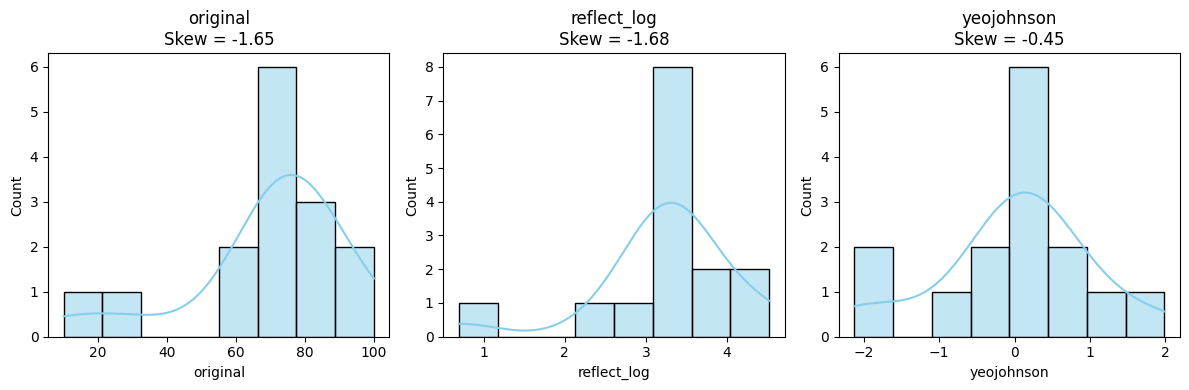

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Negative skew ma'lumot
data = [100, 90, 85, 80, 78, 77, 76, 75, 74, 73, 70, 65, 60, 30, 10]

df = pd.DataFrame({"original": data})

# Reflect + log transform
df["reflect_log"] = np.log1p(max(data) + 1 - df["original"])

# Yeo-Johnson
pt = PowerTransformer(method="yeo-johnson")
df["yeojohnson"] = pt.fit_transform(df[["original"]])

# Skew qiymatlari
print("Original skew:", df["original"].skew())
print("Reflect+Log skew:", df["reflect_log"].skew())
print("Yeo-Johnson skew:", df["yeojohnson"].skew())

# Vizualizatsiya
plt.figure(figsize=(12, 4))
for i, col in enumerate(df.columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"{col}\nSkew = {df[col].skew():.2f}")
plt.tight_layout()
plt.show()


# Ushbu pastdagi kodlar overfitting va underfitting va Good(yaxshi moslashgan) fitting 
# solishtirish grafigi

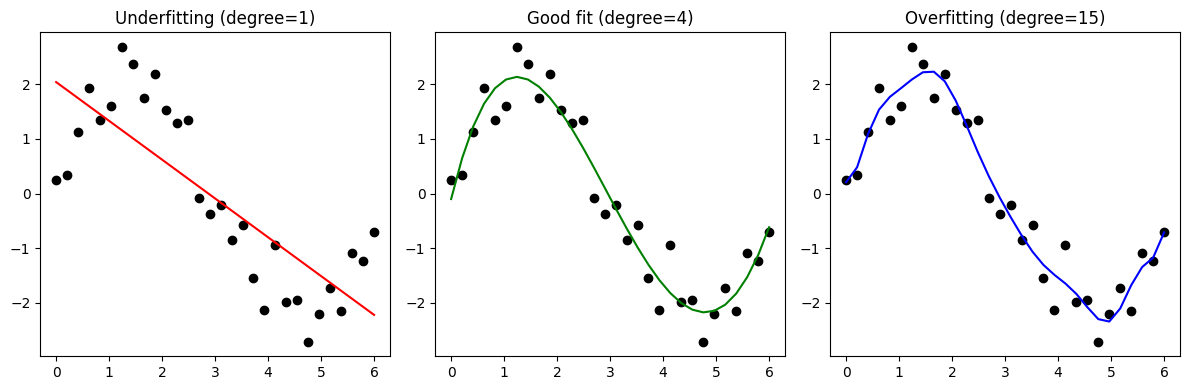

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Ma'lumotlar (x va shovqinli y)
np.random.seed(42)
x = np.linspace(0, 6, 30)
y = 2 * np.sin(x) + np.random.randn(30) * 0.5
x = x.reshape(-1, 1)

# --- 1. Underfitting (daraja=1)
poly1 = PolynomialFeatures(degree=1)
x1 = poly1.fit_transform(x)
model1 = LinearRegression().fit(x1, y)
y1_pred = model1.predict(x1)

# --- 2. Good fit (daraja=4)
poly4 = PolynomialFeatures(degree=4)
x4 = poly4.fit_transform(x)
model4 = LinearRegression().fit(x4, y)
y4_pred = model4.predict(x4)

# --- 3. Overfitting (daraja=15)
poly15 = PolynomialFeatures(degree=15)
x15 = poly15.fit_transform(x)
model15 = LinearRegression().fit(x15, y)
y15_pred = model15.predict(x15)

# --- Grafik
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(x, y, color='black')
plt.plot(x, y1_pred, color='red')
plt.title("Underfitting (degree=1)")

plt.subplot(1, 3, 2)
plt.scatter(x, y, color='black')
plt.plot(x, y4_pred, color='green')
plt.title("Good fit (degree=4)")

plt.subplot(1, 3, 3)
plt.scatter(x, y, color='black')
plt.plot(x, y15_pred, color='blue')
plt.title("Overfitting (degree=15)")

plt.tight_layout()
plt.show()
